In [1]:
#!pip install abc-analysis

# Delay_ABC

The column **Delay_ABC** is determined by dividing the range of **NormalizedDelay**>0 based on the Pareto Principle by using the ABC Analysis. This is done by classifying the delays in these categories:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** belonging to category **A** on the ABC Analysis

2: Contracts with **NormalizedDelay** belonging to category **B** on the ABC Analysis

3: Contracts with **NormalizedDelay** belonging to category **C** on the ABC Analysis

In [3]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Para realizar el análisis ABC
from abc_analysis import abc_analysis as abc

In [4]:
#Read data file obtained from datos.gov.co
# path = "C:/Users/User/Downloads/ds4a-secopII/" #path Carlos
path = "C:/Users/VMNR/Desktop/" #path vicman
# path = "../data/" #path GENERAL
file_name = 'SECOP_Electronicos_Cleaned.csv'

#Select the columns that we want to parse as dates.
date_cols = ['Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato']

df = pd.read_csv(path+file_name, parse_dates=date_cols, low_memory=False)


In [5]:

print('The shape of the original dataset is : ' + str(df.shape))

The shape of the original dataset is : (1562161, 35)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 35 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Unnamed: 0                       1562161 non-null  int64         
 1   Nombre Entidad                   1562161 non-null  object        
 2   Departamento                     1562161 non-null  object        
 3   Orden                            1562161 non-null  object        
 4   Sector                           1562161 non-null  object        
 5   Rama                             1562161 non-null  object        
 6   Entidad Centralizada             1562161 non-null  object        
 7   Estado Contrato                  1562161 non-null  object        
 8   Tipo de Contrato                 1562161 non-null  object        
 9   Modalidad de Contratacion        1562161 non-null  object        
 10  Fecha de Inicio del Contrato  

In [7]:
cat_cols = ['Departamento', 'Orden', 'Sector', 'Rama','Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
            'Es Grupo','Es Pyme', 'Destino Gasto', 'EsPostConflicto', 'Delay']
cat_values = {key:'category' for key in cat_cols}
df = df.astype(cat_values)

In [8]:
df.drop(columns='Unnamed: 0', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562161 entries, 0 to 1562160
Data columns (total 34 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Nombre Entidad                   1562161 non-null  object        
 1   Departamento                     1562161 non-null  category      
 2   Orden                            1562161 non-null  category      
 3   Sector                           1562161 non-null  category      
 4   Rama                             1562161 non-null  category      
 5   Entidad Centralizada             1562161 non-null  category      
 6   Estado Contrato                  1562161 non-null  category      
 7   Tipo de Contrato                 1562161 non-null  category      
 8   Modalidad de Contratacion        1562161 non-null  category      
 9   Fecha de Inicio del Contrato     1562161 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato     

In [10]:
df2 = df[df['Dias Adicionados']>0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231621 entries, 17 to 1562154
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Nombre Entidad                   231621 non-null  object        
 1   Departamento                     231621 non-null  category      
 2   Orden                            231621 non-null  category      
 3   Sector                           231621 non-null  category      
 4   Rama                             231621 non-null  category      
 5   Entidad Centralizada             231621 non-null  category      
 6   Estado Contrato                  231621 non-null  category      
 7   Tipo de Contrato                 231621 non-null  category      
 8   Modalidad de Contratacion        231621 non-null  category      
 9   Fecha de Inicio del Contrato     231621 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato        231621 no

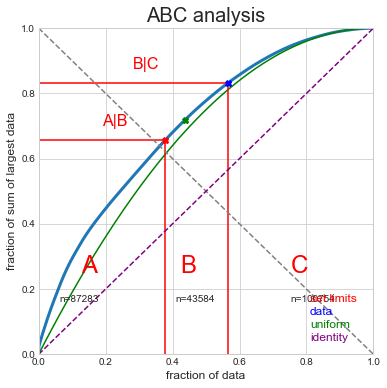

In [11]:
df_de_ABC = abc(df2['NormalizedDelay'], True)

In [12]:
#df_de_ABC

{'ABLimit': 0.3113636363636363,
 'BCLimit': 0.2163009404388714,
 'ABexchanged': False,
 'Aind': [3,
  4,
  8,
  10,
  11,
  16,
  17,
  19,
  20,
  23,
  24,
  26,
  27,
  28,
  30,
  31,
  35,
  39,
  40,
  42,
  44,
  45,
  48,
  50,
  57,
  58,
  60,
  62,
  63,
  65,
  68,
  69,
  72,
  73,
  76,
  77,
  78,
  81,
  82,
  83,
  84,
  94,
  95,
  96,
  99,
  101,
  103,
  104,
  107,
  111,
  115,
  116,
  121,
  122,
  123,
  130,
  131,
  132,
  134,
  137,
  138,
  139,
  140,
  141,
  142,
  144,
  146,
  147,
  148,
  150,
  151,
  153,
  154,
  156,
  157,
  159,
  160,
  162,
  163,
  164,
  165,
  166,
  173,
  175,
  183,
  184,
  187,
  190,
  191,
  192,
  198,
  199,
  201,
  202,
  205,
  211,
  212,
  214,
  215,
  217,
  220,
  224,
  225,
  227,
  228,
  230,
  233,
  243,
  244,
  247,
  248,
  255,
  263,
  264,
  265,
  266,
  269,
  276,
  278,
  281,
  282,
  285,
  289,
  293,
  296,
  297,
  299,
  303,
  304,
  305,
  306,
  308,
  309,
  310,
  313,
  316,
 

In [13]:
#Crear columna vacía
df['Delay_ABC'] = 0
# Categorías
limit_AB = df_de_ABC['ABLimit']
limit_BC = df_de_ABC['BCLimit'] + limit_AB
limit_AB,limit_BC


(0.3113636363636363, 0.5276645768025077)

## Intervalos

0:  **NormalizedDelay** = 0

1: 0 < **NormalizedDelay** $\leq$ 0.3113636363636363

2: 0.3113636363636363 < **NormalizedDelay** $\leq$ 0.5276645768025077

3:  **NormalizedDelay** $\geq$ 0.5276645768025077

In [14]:
df['Delay_ABC'].sample(5)

432722     0
215572     0
1087304    0
702563     0
330582     0
Name: Delay_ABC, dtype: int64

In [15]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_AB), 'Delay_ABC'] = 1
df.loc[(df['NormalizedDelay'] > limit_AB) & (df['NormalizedDelay'] <= limit_BC), 'Delay_ABC']= 2
df.loc[(df['NormalizedDelay'] > limit_BC), 'Delay_ABC'] = 3

In [16]:
df[df.Delay_ABC==0].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
887135,SENA REGIONAL SANTANDER Grupo Administrativo CGAO,Santander,Nacional,Trabajo,Ejecutivo,Descentralizada,Activo,Prestación de servicios,Contratación directa,2020-03-03,...,0,0,0,0,0,0,0,0,0.0,0


In [17]:
df[df.Delay_ABC==1].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
683490,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Corporación Autónoma,Descentralizada,Modificado,DecreeLaw092/2017,Contratación régimen especial,2021-03-23,...,31,0,0,0,0,1,0,2,0.238462,1


In [18]:
df[df.Delay_ABC==2].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
257023,AGENCIA PARA LA INFRAESTRUCTURA DEL META,Meta,Territorial,No aplica/No pertenece,Ejecutivo,Descentralizada,Modificado,Arrendamiento de muebles,Mínima cuantía,2021-12-02,...,30,0,0,0,1,0,0,2,0.508475,2


In [19]:
df[df.Delay_ABC==3].sample()

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,Dias Adicionados,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC
825339,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,"Bogotá, D.C.",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,Modificado,Prestación de servicios,Contratación régimen especial,2020-06-10,...,215,0,0,0,0,1,0,3,0.914894,3


# Delay_EQ

The column **Delay_EQ** is determined by dividing the range of **NormalizedDelay**>0 which is (0,1] into equal intervals.
By that our categories below this criteria would be:

0: Contracts of 0 days added

1: Contracts with **NormalizedDelay** $\leq$ 0.3333333333333333

2: Contracts with **NormalizedDelay** $\leq$ 0.6666666666666667

3: Contracts with **NormalizedDelay** $\geq$ 0.6666666666666667

In [20]:
df['Delay_EQ'] = 0
limit_1 = 0.3333333333333333
limit_2 = 0.6666666666666667

In [21]:
df.loc[(df['NormalizedDelay'] > 0)& (df['NormalizedDelay'] <= limit_1), 'Delay_EQ'] = 1
df.loc[(df['NormalizedDelay'] > limit_1) & (df['NormalizedDelay'] <= limit_2), 'Delay_EQ']= 2
df.loc[(df['NormalizedDelay'] > limit_2), 'Delay_EQ'] = 3

In [22]:
df.sample(10)

,Nombre Entidad,Departamento,Orden,Sector,Rama,Entidad Centralizada,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,...,PGN,SGP,SGR,RP_AGR,RP_NO_AGR,RC,Delay,NormalizedDelay,Delay_ABC,Delay_EQ
537017,SECRETARIA DISTRITAL DE SEGURIDAD CONVIVENCIA...,"Bogotá, D.C.",Nacional,No aplica/No pertenece,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2021-05-06,...,0,0,0,1,0,0,2,0.328358,2,1
557823,CONSEJO PROFESIONAL NACIONAL DE INGENIERIA,"Bogotá, D.C.",Nacional,No aplica/No pertenece,Corporación Autónoma,Descentralizada,Activo,Compraventa,Mínima cuantía,2019-10-10,...,0,0,0,0,0,0,0,0.000000,0,0
1401176,Secretaria Distrital de Integración Social - O...,"Bogotá, D.C.",Territorial,Inclusión Social y Reconciliación,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2021-04-22,...,0,1,0,0,0,0,2,0.306818,1,1
1294254,SANTIAGO DE CALI DISTRITO ESPECIAL - SECRETARÍ...,Valle del Cauca,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,Cerrado,Prestación de servicios,Contratación directa,2021-02-09,...,0,0,0,1,0,0,0,0.000000,0,0
838334,UNIDAD DE SERVICIOS PENITENCIARIOS Y CARCELARI...,"Bogotá, D.C.",Nacional,Ley de Justicia,Ejecutivo,Descentralizada,En ejecución,Prestación de servicios,Contratación directa,2020-07-30,...,1,0,0,0,0,0,0,0.000000,0,0
815826,MUNICIPIO DE DUITAMA,Boyacá,Territorial,Servicio Público,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2022-02-08,...,0,0,0,1,0,0,0,0.000000,0,0
194561,SECRETARÍA DISTRITAL DE CULTURA RECREACIÓN Y ...,"Bogotá, D.C.",Territorial,Cultura,Ejecutivo,Centralizada,terminado,Prestación de servicios,Contratación directa,2020-02-27,...,0,0,0,0,0,0,0,0.000000,0,0
1552855,SANTIAGO DE CALI DISTRITO ESPECIAL - SECRETARI...,Valle del Cauca,Territorial,deportes,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2021-11-18,...,0,0,0,1,0,0,0,0.000000,0,0
1109291,GOBERNACION DE NARIÑO,Nariño,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,Modificado,Prestación de servicios,Contratación directa,2021-02-11,...,0,0,0,1,0,0,2,0.253870,1,1
1107494,GOBERNACION DE SUCRE,Sucre,Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,En ejecución,Prestación de servicios,Contratación directa,2022-02-04,...,0,0,0,1,0,0,0,0.000000,0,0


# Modelo XGBoost-2 Variable Delay_ABC

In [23]:
print(df.columns)

Index(['Nombre Entidad', 'Departamento', 'Orden', 'Sector', 'Rama',
       'Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Es Grupo', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'EsPostConflicto', 'Destino Gasto', 'Dias Adicionados', 'PGN', 'SGP',
       'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC', 'Delay', 'NormalizedDelay',
       'Delay_ABC', 'Delay_EQ'],
      dtype='object')


In [24]:
y = df['Delay_ABC'].astype('category')
X = df.drop(['Delay'], axis=1)[['Departamento','Orden','Sector',
                                            'Rama','Entidad Centralizada',
                                            'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
                                            'Es Grupo','Es Pyme', 'Valor del Contrato', 'Valor de pago adelantado',
                                             'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado',
                                            'EsPostConflicto', 'Destino Gasto',
                                            'PGN','SGP','SGR','RP_AGR','RP_NO_AGR','RC']]

In [25]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [26]:
#!pip install xgboost

In [27]:
# Importación y definición de modelo XGBClassifier

from xgboost import XGBClassifier
from sklearn import metrics 

clf = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.6120535911329996, 0.9071722591433017)

# Modelo XGBoost-3 Variable Delay_EQ

In [29]:
y = df['Delay_EQ'].astype('category')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_samples = X_train.shape[0]

In [31]:
clf2 = XGBClassifier(tree_method="hist", enable_categorical=True)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
metrics.f1_score(y_pred, y_test.values, average= 'macro'), metrics.accuracy_score(y_pred, y_test.values)

(0.6047590546102186, 0.9110945580527396)